# Task-1

## Data Preprocessing and Exploration

### Import libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src/data_processing')))

# Import functions from preprocess_data.py
from preprocess_data import load_data, check_data, clean_data




### Load the data

In [6]:
# Define the file path
file_path = '../data/Copy of BrentOilPrices.csv'

# Load the data
data = load_data(file_path)

c:\Users\zelalem.wubet\projects\personal\ten-academy\brent-oil-price-analysis\src\data_processing\preprocess_data.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)


Data loaded successfully


In [7]:
data.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [8]:
# Check data types and missing values
check_data(data)

Data types:
 Date     datetime64[ns]
Price           float64
dtype: object

Missing values in each column:
 Date     0
Price    0
dtype: int64


In [9]:
# Clean the data
data_clean = clean_data(data)

Missing values removed
Index reset


In [10]:
# Get summary statistics of the data
data_clean.describe()

,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


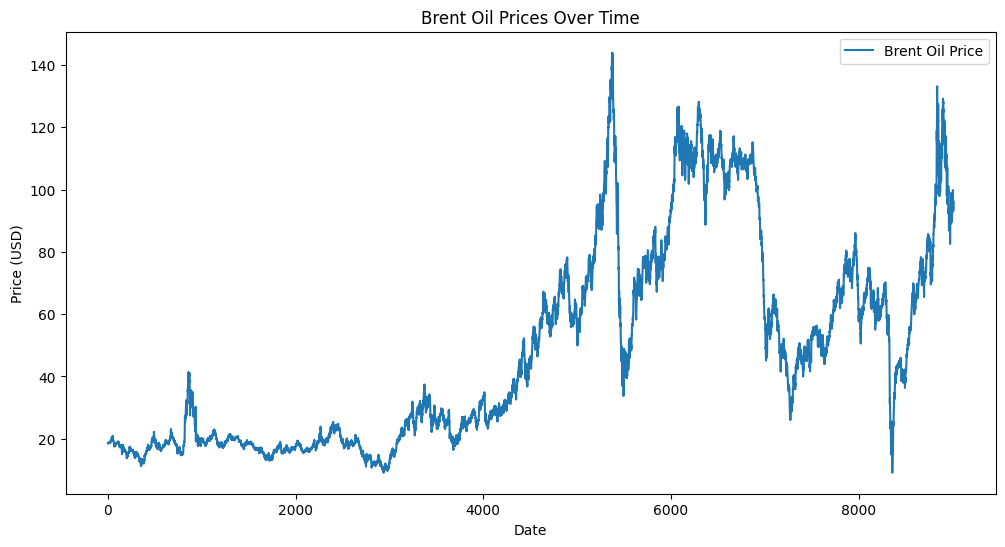

In [11]:
# Plot the data to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Brent Oil Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

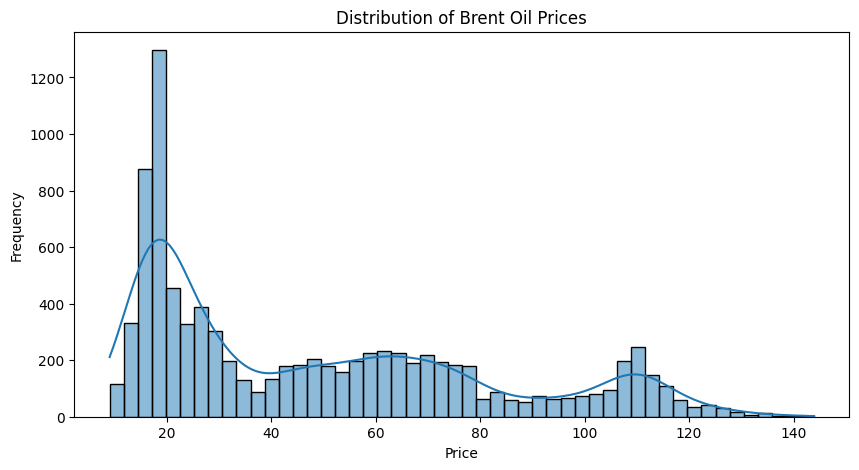

In [15]:
# Plot the distribution of Brent oil prices
plt.figure(figsize=(10, 5))
sns.histplot(data_clean['Price'], bins=50, kde=True)
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

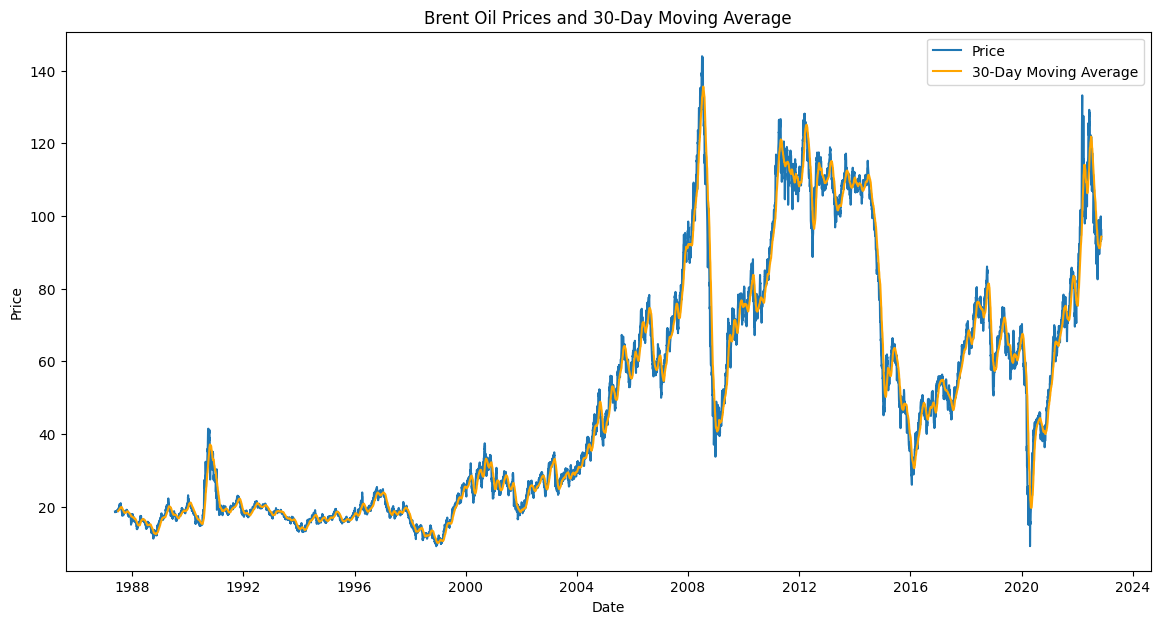

In [16]:
# Calculate and plot the moving average of oil prices
data_clean['Price_MA30'] = data_clean['Price'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(data_clean['Date'], data_clean['Price'], label='Price')
plt.plot(data_clean['Date'], data_clean['Price_MA30'], label='30-Day Moving Average', color='orange')
plt.title('Brent Oil Prices and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14540.613
Date:                Sun, 03 Nov 2024   AIC                          29093.226
Time:                        13:57:18   BIC                          29135.862
Sample:                             0   HQIC                         29107.733
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.344      0.000       0.014       0.038
ar.L2         -0.0235      0.006     -4.231      0.000      -0.034      -0.013
ar.L3         -0.0071      0.005     -1.507      0.1

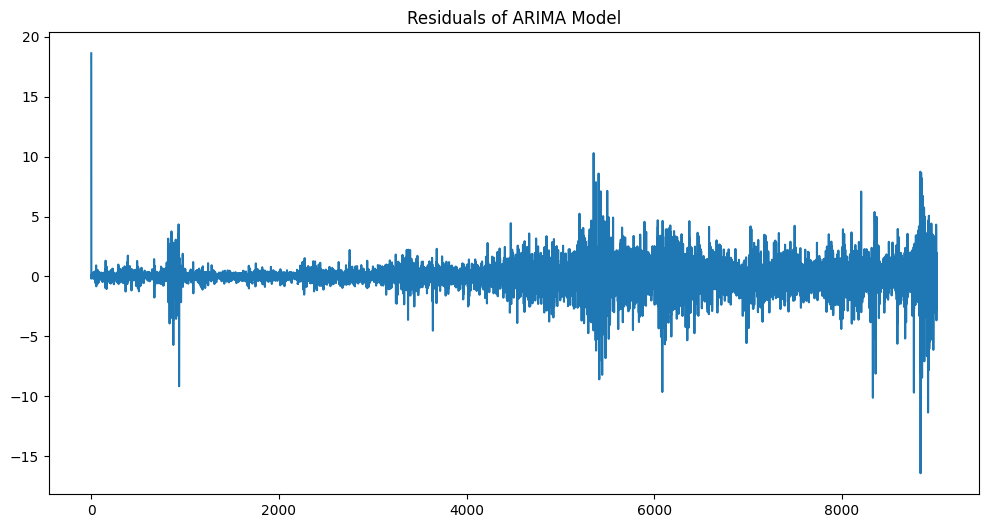

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['Price'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()
